<a href="https://colab.research.google.com/github/gustavocac/FromScratch/blob/master/NLP_101_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><div align="center">Processamento de Linguagem Natural</div></h1>
<div align="center">Gustavo C. A Corradi</div>
<div align="center"><a href="http://robotreport.me/">robotreport.me</a></div>
<div align="center">@gustavocorradi</div>

<h2><div align="left">Representação de texto</div></h2>

Aqui veremos em alguns detalhes como podemos representar melhor o texto em nosso aplicativo. 
Vamos começar importando os módulos que usaremos

In [0]:
import string
from collections import Counter
from pprint import pprint
import gzip
import matplotlib.pyplot as plt 
import numpy as np
import urllib
import pandas as pd
import numpy as np
import re
import nltk
from bs4 import BeautifulSoup
%matplotlib inline

Agora importaremos o banco de dados de artigos da revista de radiologia brasileira.

In [0]:

def url_pt_br(number):
    url = "http://www.rb.org.br/detalhe_artigo.asp?id="+str(number)+"&idioma=Portugues"
    print(url)
    return url

def extract_text(url):    
    html = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(html)
    for script in soup(["script", "style"]):
        script.extract()    # rip it out
    # baixar o texto
    text = soup.get_text()
    # quebrar em linhas e remover espaço à esquerda e à direita em cada uma delas
    lines = (line.strip() for line in text.splitlines())
    # quebrar parágrafos  de múltiplas linhas em uma frase cada
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # apagar linhas em branco
    text = '\n'.join(chunk for chunk in chunks if chunk)
    print(text)
    return text

def loop_under(number):
  cols = ['c1', 'c2', 'c3']
  list=[]
  z=0
  z2 = ' '
  for x in range(800, number):
    #print(x)
    index = z
    numero = x
    url = url_pt_br(x)
    z= z+1
    z1 = extract_text(url)
    z2 = z2 +' '+ z1 
    list.append([index, numero, z1])
    df = pd.DataFrame(list, columns=cols)
  return df, z2

In [0]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [0]:
#df, texto = loop_under(3278)
df, texto = loop_under(820)

http://www.rb.org.br/detalhe_artigo.asp?id=810&idioma=Portugues
Radiologia Brasileira -
Linfoma não-Hodgkin apresentando-se como massa hepática única
Radiologia Brasileira - Publicação Científica Oficial do Colégio Brasileiro de Radiologia
AMB - Associação Médica Brasileira CNA - Comissão Nacional de Acreditação
Idioma/Language:
Home
CBR
RB History
Editorial Board
Publication Guidelines
Advanced Search
Current Issue
Previous Issues
Paper Submission
Audience
Supplements
Ahead of Print
Contact us
Vol. 42 nº 1 - Jan. / Fev.  of 2009
ARTIGO ORIGINAL
Print
Page(s) 15 to 19
Linfoma não-Hodgkin apresentando-se como massa hepática única
Autho(rs): Mila Correia Góis Peixoto, Anibal Araújo Alves Peixoto Filho, Alessandra Caivano Rodrigues Ribeiro, Giuseppe D'Ippolito
PDF Português
PDF English
Texto em Português
English Text
Descritores: Linfoma, Fígado, Ultrassonografia, Tomografia computadorizada, Imagem por ressonância magnética
Keywords: Lymphoma, Liver, Ultrasonography, Computed tomography, 

In [0]:
texto

'  Radiologia Brasileira -\nLinfoma não-Hodgkin apresentando-se como massa hepática única\nRadiologia Brasileira - Publicação Científica Oficial do Colégio Brasileiro de Radiologia\nAMB - Associação Médica Brasileira CNA - Comissão Nacional de Acreditação\nIdioma/Language:\nHome\nCBR\nRB History\nEditorial Board\nPublication Guidelines\nAdvanced Search\nCurrent Issue\nPrevious Issues\nPaper Submission\nAudience\nSupplements\nAhead of Print\nContact us\nVol. 42\xa0nº\xa01 - Jan. / Fev. \xa0of\xa02009\nARTIGO ORIGINAL\nPrint\nPage(s) 15 to 19\nLinfoma não-Hodgkin apresentando-se como massa hepática única\nAutho(rs): Mila Correia Góis Peixoto, Anibal Araújo Alves Peixoto Filho, Alessandra Caivano Rodrigues Ribeiro, Giuseppe D\'Ippolito\nPDF Português\nPDF English\nTexto em Português\nEnglish Text\nDescritores: Linfoma, Fígado, Ultrassonografia, Tomografia computadorizada, Imagem por ressonância magnética\nKeywords: Lymphoma, Liver, Ultrasonography, Computed tomography, Magnetic resonance 

Escolhemos uma revista de radiologia bem conhecida, e usaremos como seu textos  em nosso exemplo


## Tokenização
O primeiro passo em qualquer análise é tokenizar o texto. O que isto significa é que extrairemos todas as palavras individuais no texto. Por uma questão de simplicidade, assumiremos que nosso texto está bem formado e que nossas palavras são delimitadas por espaços em branco ou caracteres de pontuação.

In [0]:


def extract_words(text):
    #print(text)
    temp = text.split() 
    temp = [w.replace("-", " ") for w in temp]
    #print(temp)
    # Split the text on whitespace
    text_words = []
    table = str.maketrans('', '', string.punctuation)
    text_words = [w.translate(table) for w in temp]
    
    text_words = [w.lower() for w in text_words]
    text_words[:] = [item for item in text_words if item != ' ']
    return text_words



Após esta etapa, agora temos nosso texto representado como um lista de palavras em letras minúsculas

In [0]:
#df['c4'] = df['c3'].apply(lambda x: extract_words(x))
text_words = extract_words(texto)
print(text_words)

['radiologia', 'brasileira', 'linfoma', 'não hodgkin', 'apresentando se', 'como', 'massa', 'hepática', 'única', 'radiologia', 'brasileira', 'publicação', 'científica', 'oficial', 'do', 'colégio', 'brasileiro', 'de', 'radiologia', 'amb', 'associação', 'médica', 'brasileira', 'cna', 'comissão', 'nacional', 'de', 'acreditação', 'idiomalanguage', 'home', 'cbr', 'rb', 'history', 'editorial', 'board', 'publication', 'guidelines', 'advanced', 'search', 'current', 'issue', 'previous', 'issues', 'paper', 'submission', 'audience', 'supplements', 'ahead', 'of', 'print', 'contact', 'us', 'vol', '42', 'nº', '1', 'jan', '', 'fev', 'of', '2009', 'artigo', 'original', 'print', 'pages', '15', 'to', '19', 'linfoma', 'não hodgkin', 'apresentando se', 'como', 'massa', 'hepática', 'única', 'authors', 'mila', 'correia', 'góis', 'peixoto', 'anibal', 'araújo', 'alves', 'peixoto', 'filho', 'alessandra', 'caivano', 'rodrigues', 'ribeiro', 'giuseppe', 'dippolito', 'pdf', 'português', 'pdf', 'english', 'texto', '

Como vimos podemos ser muito mais eficientes representando cada palavra por um número

In [0]:


word_dict = {}
word_list = []
vocabulary_size = 0
text_tokens = []

for word in text_words:
    # If we are seeing this word for the first time, create an id for it and added it to our word dictionary
    if word not in word_dict:
        word_dict[word] = vocabulary_size
        word_list.append(word)
        vocabulary_size += 1
    
    # add the token corresponding to the current word to the tokenized text.
    text_tokens.append(word_dict[word])



Quando estávamos tokenizando nosso texto, também geramos um dicionário word_dict que mapeia palavras para números inteiros e uma word_list que mapeia cada número inteiro para a palavra correspondente.

In [0]:
print("Word list:", word_list, "\n\n Word dictionary:")
pprint(word_dict)

Streaming output truncated to the last 5000 lines.
 '779': 2780,
 '78°': 2948,
 '7°': 979,
 '8': 402,
 '80': 474,
 '804': 1510,
 '82': 1648,
 '82 year old': 5121,
 '831': 4340,
 '85': 1444,
 '852008': 2479,
 '854': 3352,
 '86': 1686,
 '862008': 4678,
 '883': 2936,
 '889': 2765,
 '896': 3355,
 '9': 785,
 '90': 1283,
 '90035 140': 5350,
 '90°': 2552,
 '926': 1688,
 '927': 3791,
 '93': 2198,
 '94': 2199,
 '945': 3793,
 '95': 947,
 '950': 2769,
 '9785': 1805,
 'a': 142,
 'abaixo': 1340,
 'abdom': 711,
 'abdome': 430,
 'abdomen': 2414,
 'abdomes': 2059,
 'abdominal': 375,
 'abduzido': 2665,
 'abdução': 2628,
 'abdução910': 2676,
 'aberrantes': 2340,
 'aberta': 4294,
 'abertura': 2296,
 'abnormal': 4736,
 'abordam': 1827,
 'abrange': 4008,
 'abreu': 775,
 'abril': 3452,
 'abrupto': 4053,
 'abscess': 767,
 'abscesso': 494,
 'abscesso7': 329,
 'absorvidas': 3515,
 'abstract': 185,
 'ac': 3916,
 'acabam': 1800,
 'acabou': 3763,
 'acad': 4571,
 'acarretam': 2637,
 'acarretar': 3092,
 'accompanie

Essas duas estruturas de dados já provaram sua utilidade quando convertemos nosso texto em uma lista de tokens.



In [0]:
print(text_tokens)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 9, 10, 11, 12, 13, 14, 15, 0, 16, 17, 18, 1, 19, 20, 21, 15, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 43, 54, 55, 56, 44, 57, 58, 59, 60, 2, 3, 4, 5, 6, 7, 8, 61, 62, 63, 64, 65, 66, 67, 68, 65, 69, 70, 71, 72, 73, 74, 75, 76, 77, 76, 78, 79, 80, 77, 78, 81, 82, 2, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 15, 87, 12, 2, 3, 4, 5, 6, 7, 8, 106, 107, 108, 109, 110, 111, 112, 113, 15, 114, 15, 115, 116, 6, 7, 8, 117, 118, 15, 84, 85, 86, 107, 89, 90, 116, 119, 120, 15, 2, 3, 121, 118, 122, 123, 88, 124, 125, 80, 126, 127, 128, 129, 115, 130, 12, 131, 132, 133, 134, 135, 15, 136, 116, 137, 138, 139, 107, 140, 141, 6, 7, 8, 107, 116, 119, 15, 2, 3, 133, 84, 142, 143, 7, 144, 5, 6, 116, 145, 80, 146, 147, 129, 114, 148, 133, 85, 86, 149, 6, 150, 107, 151, 116, 152, 153, 80, 130, 154, 114, 133, 89, 90, 103, 155, 156, 1

Infelizmente, embora essa representação possui algumas limitações graves, principal é o fato de que os computadores assumem naturalmente que os números podem ser operados matematicamente (por adição, subtração, etc.) de um modo que não tenha representaççãão línguistica.

## One-hot encoding
Uma maneira típica de superar essa dificuldade é representar cada palavra por um vetor codificado, onde cada elemento é zero, exceto o que corresponde a uma palavra específica.

In [0]:
def one_hot(word, word_dict):
    """
        Generate a one-hot encoded vector corresponding to *word*
    """
    
    vector = np.zeros(len(word_dict))
    vector[word_dict[word]] = 1
    
    return vector

In [0]:
len(word_dict)

5417

Assim, por exemplo, a palavra "radiologia" seria representada por:



In [0]:
A_hot = one_hot("radiologia", word_dict)
print(A_hot)

[1. 0. 0. ... 0. 0. 0.]


Esse vetor tem todo elemento definido como zero, exceto o elemento 0(primeiro elemento da lista), pois:


In [0]:
print(word_dict["radiologia"])
fleece_hot[0] == 1

0


True

## Bag of words(BOW)

Agora, podemos usar o vetor codificado de cada palavra para produzir uma representação vetorial do texto original, simplesmente adicionando todos os vetores codificados a quente:

In [0]:



text_vector = np.zeros(vocabulary_size)

for word in text_words:
    text_vector[word_dict[word]] += 1
    
print(text_vector)





[72. 31. 30. ...  1.  1.  1.]


In [0]:
text_vector[word_dict["radiologia"]]

72.0

In [0]:
text_vector[word_dict["abdome"]]


12.0

Isso é conhecido como representação do __bag of words__ do texto. Deve-se notar que esses vetores simplesmente contêm o número de vezes que cada palavra aparece em nosso documento.

Uma maneira mais eficiente de produzir o mesmo resultado é usar o módulo __Counter__ padrão:

In [0]:
word_counts = Counter(text_words)
pprint(word_counts)

Streaming output truncated to the last 5000 lines.
         'mediastino': 10,
         'clínico': 9,
         'findings': 9,
         'cases': 9,
         'were': 9,
         'on': 9,
         'primário': 9,
         'apesar': 9,
         'envolvimento': 9,
         '16': 9,
         'janeiro': 9,
         'considerada': 9,
         'periférico': 9,
         '40': 9,
         'rara': 9,
         'padrão': 9,
         'considerados': 9,
         'eur': 9,
         'silva': 9,
         'clínicas': 9,
         'report': 9,
         'l': 9,
         'clin': 9,
         '20': 9,
         '21': 9,
         'técnicas': 9,
         'exposição': 9,
         'áreas': 9,
         'utilizado': 9,
         'variáveis': 9,
         'diferentes': 9,
         'investigação': 9,
         'médio': 9,
         'possível': 9,
         'tabela': 9,
         'cgycm2': 9,
         'embora': 9,
         'pelos': 9,
         'sistema': 9,
         'br': 9,
         'examinations': 9,
         'centro': 9,
    

A partir do qual podemos gerar facilmente os dados __text_vector__ e __word_dict__


In [0]:
items = list(word_counts.items())

# Extract word dictionary and vector representation
word_dict2 = dict([[items[i][0], i] for i in range(len(items))])
text_vector2 = [items[i][1] for i in range(len(items))]

In [0]:
print("Text vector:", text_vector2, "\n\nWord dictionary:")
pprint(word_dict2)

Streaming output truncated to the last 5000 lines.
 '779': 2780,
 '78°': 2948,
 '7°': 979,
 '8': 402,
 '80': 474,
 '804': 1510,
 '82': 1648,
 '82 year old': 5121,
 '831': 4340,
 '85': 1444,
 '852008': 2479,
 '854': 3352,
 '86': 1686,
 '862008': 4678,
 '883': 2936,
 '889': 2765,
 '896': 3355,
 '9': 785,
 '90': 1283,
 '90035 140': 5350,
 '90°': 2552,
 '926': 1688,
 '927': 3791,
 '93': 2198,
 '94': 2199,
 '945': 3793,
 '95': 947,
 '950': 2769,
 '9785': 1805,
 'a': 142,
 'abaixo': 1340,
 'abdom': 711,
 'abdome': 430,
 'abdomen': 2414,
 'abdomes': 2059,
 'abdominal': 375,
 'abduzido': 2665,
 'abdução': 2628,
 'abdução910': 2676,
 'aberrantes': 2340,
 'aberta': 4294,
 'abertura': 2296,
 'abnormal': 4736,
 'abordam': 1827,
 'abrange': 4008,
 'abreu': 775,
 'abril': 3452,
 'abrupto': 4053,
 'abscess': 767,
 'abscesso': 494,
 'abscesso7': 329,
 'absorvidas': 3515,
 'abstract': 185,
 'ac': 3916,
 'acabam': 1800,
 'acabou': 3763,
 'acad': 4571,
 'acarretam': 2637,
 'acarretar': 3092,
 'accompanie

**bold text**## Term Frequency

A representação vetorial do conjunto de palavras introduzida acima depende simplesmente da frequência de ocorrência de cada palavra. Seguindo uma longa tradição de dar nomes sofisticados a idéias simples, isso é conhecido como Term Frequency.

Intuitivamente, esperamos que a frequência com que uma determinada palavra seja mencionada corresponda à relevância dessa palavra para o trecho de texto que estamos considerando. 

In [0]:
sorted(items, key=lambda x:x[1], reverse=True)

[('de', 76),
 ('a', 40),
 ('e', 37),
 ('os', 33),
 ('-', 29),
 ('do', 26),
 ('com', 21),
 ('styloideum', 20),
 ('em', 20),
 ('por', 18),
 ('no', 17),
 ('da', 16),
 ('o', 16),
 ('dor', 10),
 ('para', 10),
 ('na', 10),
 ('of', 9),
 ('um', 9),
 ('diagnóstico', 9),
 ('radiologia', 8),
 ('é', 8),
 ('[', 8),
 (']', 8),
 ('imagem', 7),
 ('que', 7),
 ('punho', 7),
 ('as', 7),
 ('dos', 7),
 ('ou', 7),
 ('brasileira', 6),
 ('associação', 6),
 ('print', 6),
 ('edema', 6),
 ('entre', 6),
 ('como', 6),
 ('the', 6),
 ('in', 6),
 ('carpal', 6),
 ('pela', 6),
 ('tomografia', 5),
 ('computadorizada', 5),
 ('ressonância', 5),
 ('magnética', 5),
 ('caso', 5),
 ('styloideum,', 5),
 ('boss', 5),
 ('and', 5),
 ('terceiro', 5),
 ('são', 5),
 ('base', 5),
 ('foi', 5),
 ('ao', 5),
 ('tc', 5),
 ('gordura', 5),
 ('visceral', 5),
 ('colégio', 4),
 ('brasileiro', 4),
 ('to', 4),
 ('português', 4),
 ('ósseo', 4),
 ('imaging', 4),
 ('ossículo', 4),
 ('uma', 4),
 ('an', 4),
 ('ossos', 4),
 ('segundo', 4),
 ('ser', 4)

In [158]:
df, texto = loop_under(1820)




Streaming output truncated to the last 5000 lines.
Radiologia Brasileira - Publicação Científica Oficial do Colégio Brasileiro de Radiologia
AMB - Associação Médica Brasileira CNA - Comissão Nacional de Acreditação
Idioma/Language:
Home
CBR
RB History
Editorial Board
Publication Guidelines
Advanced Search
Current Issue
Previous Issues
Paper Submission
Audience
Supplements
Ahead of Print
Contact us
Vol. 35 nº 4 - Jul. / Ago.  of 2002
ARTIGO ORIGINAL
Print
Page(s) 195 to 198
Nódulos com sinal do halo na aspergilose pulmonar angioinvasiva: correlação da tomografia computadorizada de alta resolução com a anatomopatologia
Autho(rs): Edson Marchiori, Paulo Marcos Valiante, Arthur Soares Souza Jr.
PDF Português
Texto em Português
English Text
Descritores: Aspergilose angioinvasiva, Tomografia computadorizada de alta resolução, Anatomopatologia, Pulmões
Keywords: Angioinvasive aspergillosis, High-resolution computed tomography, Anatomopathology, Lungs
Resumo:
O objetivo do trabalho é apresenta

In [0]:
text_words = extract_words(texto)
word_counts = Counter(text_words)
items = list(word_counts.items())
word_dict2 = dict([[items[i][0], i] for i in range(len(items))])
text_vector2 = [items[i][1] for i in range(len(items))]
counts = Counter(data)
sorted_counts = sorted(list(counts.items()), key=lambda x:x[1], reverse=True)
for word, count in sorted_counts[:10]:
    print(word, count)

compensação 5416
acurada 5415
forame 5414
panorâmicas 5413
reprodutibilidade 5412
aumentou 5411
padronizado 5410
radiográfico 5409
ampliação 5408
correção 5407


Surpreendentemente, descobrimos que as palavras mais comuns não são particularmente significativas. De fato, essa é uma ocorrência comum no Processamento de linguagem natural. As palavras mais frequentes são normalmente auxiliares devido às regras gramaticais.
Por outro lado, também há um grande número de palavras que ocorrem com pouca frequência, como pode ser facilmente visto olhando a distribuição de frequência da palavra.

Text(0.5, 1.0, 'Word frequency distribution')

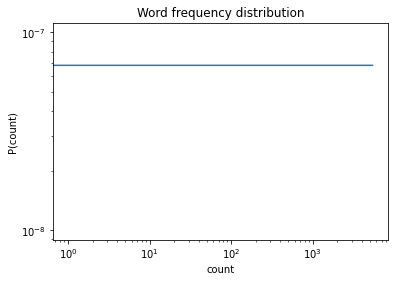

In [0]:
dist = Counter(counts.values())
dist = list(dist.items())
dist.sort(key=lambda x:x[0])
dist = np.array(dist)

norm = np.dot(dist.T[0], dist.T[1])

plt.loglog(dist.T[0], dist.T[1]/norm)
plt.xlabel("count")
plt.ylabel("P(count)")
plt.title("Word frequency distribution")

## Stopwords

Uma técnica comum para simplificar as tarefas da NLP é remover o que é conhecido como Stopwords, palavras muito frequentes, mas sem sentido. Se simplesmente removermos as 100 palavras mais comuns, reduziremos significativamente a quantidade de dados que devemos considerar e perderemos pouca informação.

In [0]:
stopwords = set([word for word, count in sorted_counts[:100]])

clean_data = []

for word in data:
    if word not in stopwords:
        clean_data.append(word)

print("Original size:", len(data))
print("Clean size:", len(clean_data))
print("Reduction:", 1-len(clean_data)/len(data))

Original size: 17005207
Clean size: 9006229
Reduction: 0.470384041782026


Na prática, não removemos simplesmente as palavras mais comuns em nosso corpus, mas uma lista com curadoria manual de palavras-chave. Listas para dezenas de idiomas e aplicativos podem ser facilmente encontradas online.

## Term Frequency/Inverse Document Frequency

Uma maneira de determinar a importância relativa de uma palavra é ver com que frequência ela aparece em vários documentos. Palavras que são relevantes para um tópico específico têm maior probabilidade de aparecer em documentos sobre esse tópico e muito menos em documentos sobre outros tópicos. Por outro lado, palavras menos significativas (como as) serão comuns nos documentos sobre qualquer assunto.

Para medir a frequência do documento de uma palavra, precisamos ter vários documentos. Por uma questão de simplicidade, trataremos cada frase da nossa rima de berçário como um documento individual:



In [0]:
corpus_text = text.split('.')
corpus_words = []
for document in corpus_text:
    doc_words = extract_words(document)
    corpus_words.append(doc_words)

![alt text](https://)Now our corpus is represented as a list of word lists, where each list is just the word representation of the corresponding sentence:

In [0]:
pprint(corpus_words)

[['mary', 'had', 'a', 'little', 'lamb', 'little', 'lamb', 'little', 'lamb'],
 ['mary',
  'had',
  'a',
  'little',
  'lamb',
  'whose',
  'fleece',
  'was',
  'white',
  'as',
  'snow'],
 ['and', 'everywhere', 'that', 'mary', 'went', 'mary', 'went', 'mary', 'went'],
 ['everywhere',
  'that',
  'mary',
  'went',
  'the',
  'lamb',
  'was',
  'sure',
  'to',
  'go']]


Let us now calculate the number of documents in which each word appears:

In [0]:
document_count = {}

for document in corpus_words:
    word_set = set(document)
    
    for word in word_set:
        document_count[word] = document_count.get(word, 0) + 1

pprint(document_count)

{'a': 2,
 'and': 1,
 'as': 1,
 'everywhere': 2,
 'fleece': 1,
 'go': 1,
 'had': 2,
 'lamb': 3,
 'little': 2,
 'mary': 4,
 'snow': 1,
 'sure': 1,
 'that': 2,
 'the': 1,
 'to': 1,
 'was': 2,
 'went': 2,
 'white': 1,
 'whose': 1}


In [0]:
def inv_doc_freq(corpus_words):
    number_docs = len(corpus_words)
    
    document_count = {}

    for document in corpus_words:
        word_set = set(document)

        for word in word_set:
            document_count[word] = document_count.get(word, 0) + 1
    
    IDF = {}
    
    for word in document_count:
        IDF[word] = np.log(number_docs/document_count[word])
        
    
    return IDF

Onde seguimos a convenção de usar o logaritmo da frequência inversa do documento. Isso tem a vantagem numérica de evitar ter que lidar com pequenos números fracionários.

Podemos ver facilmente que o IDF atribui um peso menor às palavras mais comuns e um peso maior às menos frequentes:

In [0]:
IDF = inv_doc_freq(corpus_words)

pprint(IDF)

{'a': 0.6931471805599453,
 'and': 1.3862943611198906,
 'as': 1.3862943611198906,
 'everywhere': 0.6931471805599453,
 'fleece': 1.3862943611198906,
 'go': 1.3862943611198906,
 'had': 0.6931471805599453,
 'lamb': 0.28768207245178085,
 'little': 0.6931471805599453,
 'mary': 0.0,
 'snow': 1.3862943611198906,
 'sure': 1.3862943611198906,
 'that': 0.6931471805599453,
 'the': 1.3862943611198906,
 'to': 1.3862943611198906,
 'was': 0.6931471805599453,
 'went': 0.6931471805599453,
 'white': 1.3862943611198906,
 'whose': 1.3862943611198906}


As expected **Mary** has the smallest weight of all words 0, meaning that it is effectively removed from the dataset. You can consider this as a way of implicitly identify and remove stopwords. In case you do want to keep even the words that appear in every document, you can just add a 1. to the argument of the logarithm above:

\begin{equation}
\log\left[1+\frac{N_d}{N_d\left(w\right)}\right]
\end{equation}

When we multiply the term frequency of each word by it's inverse document frequency, we have a good way of quantifying how relevant a word is to understand the meaning of a specific document.

In [0]:
def tf_idf(corpus_words):
    IDF = inv_doc_freq(corpus_words)
    
    TFIDF = []
    
    for document in corpus_words:
        TFIDF.append(Counter(document))
    
    for document in TFIDF:
        for word in document:
            document[word] = document[word]*IDF[word]
            
    return TFIDF

In [0]:
tf_idf(corpus_words)

[Counter({'mary': 0.0,
          'had': 0.6931471805599453,
          'a': 0.6931471805599453,
          'little': 2.0794415416798357,
          'lamb': 0.8630462173553426}),
 Counter({'mary': 0.0,
          'had': 0.6931471805599453,
          'a': 0.6931471805599453,
          'little': 0.6931471805599453,
          'lamb': 0.28768207245178085,
          'whose': 1.3862943611198906,
          'fleece': 1.3862943611198906,
          'was': 0.6931471805599453,
          'white': 1.3862943611198906,
          'as': 1.3862943611198906,
          'snow': 1.3862943611198906}),
 Counter({'and': 1.3862943611198906,
          'everywhere': 0.6931471805599453,
          'that': 0.6931471805599453,
          'mary': 0.0,
          'went': 2.0794415416798357}),
 Counter({'everywhere': 0.6931471805599453,
          'that': 0.6931471805599453,
          'mary': 0.0,
          'went': 0.6931471805599453,
          'the': 1.3862943611198906,
          'lamb': 0.28768207245178085,
          'was': 0.

Now we finally have a vector representation of each of our documents that takes the informational contributions of each word into account. Each of these vectors provides us with a unique representation of each document, in the context (corpus) in which it occurs, making it posssible to define the similarity of two documents, etc.

## Porter Stemmer

There is still, however, one issue with our approach to representing text. Since we treat each word as a unique token and completely independently from all others, for large documents we will end up with many variations of the same word such as verb conjugations, the corresponding adverbs and nouns, etc. 

One way around this difficulty is to use stemming algorithm to reduce words to their root (or stem) version. The most famous Stemming algorithm is known as the **Porter Stemmer** and was introduced by Martin Porter in 1980 [Program 14, 130 (1980)](https://dl.acm.org/citation.cfm?id=275705)

The algorithm starts by defining consonants (C) and vowels (V):

In [0]:
V = set('aeiouy')
C = set('bcdfghjklmnpqrstvwxz')

The stem of a word is what is left of that word after a speficic ending has been removed. A function to do this is easy to implement:

In [0]:
def get_stem(suffix, word):
    """
        Extract the stem of a word
    """
    
    if word.lower().endswith(suffix.lower()): # Case insensitive comparison
        return word[:-len(suffix)]

    return None

It also defines words (or stems) to be sequences of vowels and consonants of the form:

\begin{equation}
[C](VC)^m[V]
\end{equation}

where $m$ is called the **measure** of the word and [] represent optional sections. 

In [0]:
def measure(orig_word):
    """
        Calculate the "measure" m of a word or stem, according to the Porter Stemmer algorthim
    """
    
    word = orig_word.lower()

    optV = False
    optC = False
    VC = False
    m = 0

    pos = 0

    # We can think of this implementation as a simple finite state machine
    # looks for sequences of vowels or consonants depending of the state
    # in which it's in, while keeping track of how many VC sequences it
    # has encountered.
    # The presence of the optional V and C portions is recorded in the
    # optV and optC booleans.
    
    # We're at the initial state.
    # gobble up all the optional consonants at the beginning of the word
    while pos < len(word) and word[pos] in C:
        pos += 1
        optC = True

    while pos < len(word):
        # Now we know that the next state must be a vowel
        while pos < len(word) and word[pos] in V:
            pos += 1
            optV = True

        # Followd by a consonant
        while pos < len(word) and word[pos] in C:
            pos += 1
            optV = False
        
        # If a consonant was found, then we matched VC
        # so we should increment m by one. Otherwise, 
        # optV remained true and we simply had a dangling
        # V sequence.
        if not optV:
            m += 1

    return m

Let's consider a simple example. The word __crepusculars__ should have measure 4:

[cr] (ep) (usc) (ul) (ars)

and indeed it does.

In [0]:
word = "crepusculars"
print(measure(word))

4


The Porter algorithm sequentially applies a series of transformation rules over a series of 5 steps (step 1 is divided in 3 substeps and step 5 in 2). The rules are only applied if a certain condition is true. 

In addition to possibily specifying a requirement on the measure of a word, conditions can make use of different boolean functions as well: 

In [0]:
def ends_with(char, stem):
    """
        Checks the ending of the word
    """
    return stem[-1] == char

def double_consonant(stem):
    """
        Checks the ending of a word for a double consonant
    """
    if len(stem) < 2:
        return False

    if stem[-1] in C and stem[-2] == stem[-1]:
        return True

    return False

def contains_vowel(stem):
    """
        Checks if a word contains a vowel or not
    """
    return len(set(stem) & V) > 0 

Finally, we define a function to apply a specific rule to a word or stem:

In [0]:
def apply_rule(condition, suffix, replacement, word):
    """
        Apply Porter Stemmer rule.
        if "condition" is True replace "suffix" by "replacement" in "word"
    """
    
    stem = get_stem(suffix, word)

    if stem is not None and condition is True:
        # Remove the suffix
        word = stem

        # Add the replacement suffix, if any
        if replacement is not None:
            word += replacement

    return word

Now we can see how rules can be applied. For example, this rule, from step 1b is successfully applied to __pastered__:

In [0]:
word = "plastered"
suffix = "ed"
stem = get_stem(suffix, word)
apply_rule(contains_vowel(stem), suffix, None, word)

'plaster'

While try applying the same rule to **bled** will fail to pass the condition resulting in no change.

In [0]:
word = "bled"
suffix = "ed"
stem = get_stem(suffix, word)
apply_rule(contains_vowel(stem), suffix, None, word)

'bled'

For a more complex example, we have, in Step 4:

In [0]:
word = "adoption"
suffix = "ion"
stem = get_stem(suffix, word)
apply_rule(measure(stem) > 1 and (ends_with("s", stem) or ends_with("t", stem)), suffix, None, word)

'adopt'

In total, the Porter Stemmer algorithm (for the English language) applies several dozen rules (see https://tartarus.org/martin/PorterStemmer/def.txt for a complete list). Implementing all of them is both tedious and error prone, so we abstain from providing a full implementation of the algorithm here. High quality implementations can be found in all major NLP libraries such as [NLTK](http://www.nltk.org/howto/stem.html).

The dificulties of defining matching rules to arbitrary text cannot be fully resolved without the use of Regular Expressions (typically implemented as Finite State Machines like our __measure__ implementation above), a more advanced topic that is beyond the scope of this course.